# Welcome

This is the demo for 
https://github.com/vegetablejuiceftw/soft-pointer-networks

Look for updated notebook and models in there :)

# Setup

In [0]:
from IPython.display import clear_output
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

CACHE = {}
class SkipExecution(Exception):
    def _render_traceback_(self):
        print("Skip execution")
        clear_output()

try:
    import python_speech_features
except:
    pass            
else:
    raise SkipExecution

!pip install kaggle python_speech_features dtw fastdtw dtaidistance AudAugio pyrubberband --upgrade -q 
!apt install soundstretch rubberband-cli librubberband2 libsndfile1 > /dev/null
# !kaggle datasets download -d mfekadu/darpa-timit-acousticphonetic-continuous-speech > /dev/null
!gdown -O data.zip --id "15MxBckNzyEjO7cpY38O38NaWnssShl2l"
!unzip data.zip > /dev/null
!git clone https://github.com/vegetablejuiceftw/soft-pointer-networks spn
# !mv soft-pointer-networks/* .

clear_output()

SkipExecution: ignored

In [0]:
!cd spn && git fetch && git reset --hard origin/master
clear_output()

In [0]:
from spn.dataset_loader import *

limit = 100  # None means unlimited, else 100 would mean to load only the first 100 files
limit = None

# To enable training files
# train_files = DirectMaskDataset.load_csv('train', sa=False)
# train_files, train_eval_files = train_test_split(train_files, test_size=500, random_state=42)
# train_dataset = DirectMaskDataset(train_files, limit=limit)
# train_eval_dataset = DirectMaskDataset(train_eval_files, limit=limit)

# To enable   augmented   training files
# train_augment_dataset = DirectMaskDataset(train_files, limit=None, augment=True, duplicate=3)

test_files = DirectMaskDataset.load_csv('test', sa=False)  # do not import calibration sentences
test_dataset = DirectMaskDataset(test_files, limit=limit)
clear_output()

# Soft pointer network

In [0]:
from spn.models.soft_pointer_network import SoftPointerNetwork

soft_pointer_model = SoftPointerNetwork(54, 26, 256, device=device)
soft_pointer_model.load(path='trained_weights/position_model-final.pth')

print(soft_pointer_model)
print(soft_pointer_model.with_weights)

SoftPointerNetwork.with_gradient
SoftPointerNetwork.with_weights


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


# SPN boundary agreement

[id:848]  [ -770    81]    58 True
[id:933]  [  -15   781]    33 False
<function amax at 0x7f4f2bd65c80>
54
ng   45.33ms        zh   45.75ms        th   46.76ms        ah   55.19ms        aw   58.96ms        
nx   62.30ms        er   62.75ms        hv   63.05ms        uw   64.62ms        jh   64.83ms        
aa   73.18ms        ax-h 78.56ms        ch   79.13ms        ow   83.49ms        sh   86.49ms        
uh   90.57ms        hh   95.75ms        tcl  103.88ms       t    123.67ms       z    128.49ms       
v    133.82ms       y    159.10ms       ae   173.92ms       n    176.68ms       pcl  180.49ms       
ux   196.41ms       ey   208.24ms       dcl  213.43ms       ih   230.77ms       b    231.58ms       
bcl  232.63ms       oy   243.14ms       eh   249.86ms       dh   255.89ms       d    259.95ms       
s    271.12ms       axr  283.01ms       dx   299.68ms       m    304.65ms       p    305.75ms       
pau  312.43ms       iy   333.21ms       ix   338.35ms       w    349.69ms       ax  

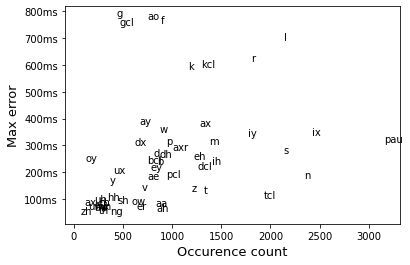

<function mean at 0x7f4f2bce99d8>
54
er    5.89ms        ng    6.30ms        dh    6.31ms        aw    6.31ms        jh    6.36ms        
n     6.39ms        ah    6.39ms        t     6.41ms        hv    6.44ms        sh    6.45ms        
ch    6.52ms        ux    6.58ms        pcl   6.61ms        v     6.62ms        ow    6.62ms        
tcl   6.68ms        iy    6.69ms        th    6.72ms        uw    6.75ms        uh    6.76ms        
z     6.77ms        b     6.80ms        pau   6.84ms        m     6.84ms        hh    6.88ms        
aa    6.88ms        ax    6.90ms        r     6.97ms        dcl   6.99ms        nx    7.04ms        
ix    7.05ms        ih    7.06ms        p     7.09ms        axr   7.12ms        eh    7.15ms        
bcl   7.16ms        ey    7.16ms        s     7.21ms        ax-h  7.25ms        dx    7.28ms        
y     7.30ms        d     7.38ms        l     7.48ms        f     7.51ms        ae    7.58ms        
kcl   7.66ms        ao    7.79ms        gcl   7.81ms  

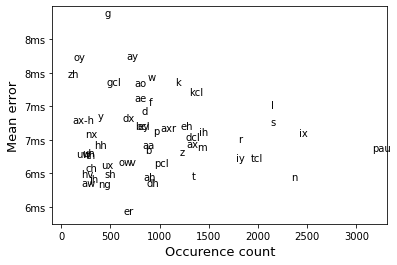

TOTAL 344924.16
[position] DIFF abs mean: 7.01ms (-0.39) min:0.00ms max:780.91ms
	55.98%	 < 5ms		81.92%	 < 10ms	
	90.88%	 < 15ms		94.60%	 < 20ms	
	96.60%	 < 25ms		97.79%	 < 30ms	
	98.47%	 < 35ms		98.85%	 < 40ms	
	99.14%	 < 45ms		99.34%	 < 50ms	
	99.47%	 < 55ms		99.56%	 < 60ms	
	99.64%	 < 65ms		99.66%	 < 70ms	
	99.69%	 < 75ms		99.71%	 < 80ms	
	99.73%	 < 85ms		99.75%	 < 90ms	
	99.76%	 < 95ms		99.78%	 < 100ms	
	99.80%	 < 105ms		100.00%	 < 9999ms	
55.98% 81.92% 90.88% 94.60% 96.60% 97.79% 98.47% 98.85% 99.14% 99.34% 99.47% 99.56% 99.64% 99.66% 99.69% 99.71% 99.73% 99.75% 99.76% 99.78% 


In [0]:
from spn.tools import *
show_position_batched(soft_pointer_model.with_gradient, test_dataset, duration_combined_model=None)

# SPN visual examples

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


[]

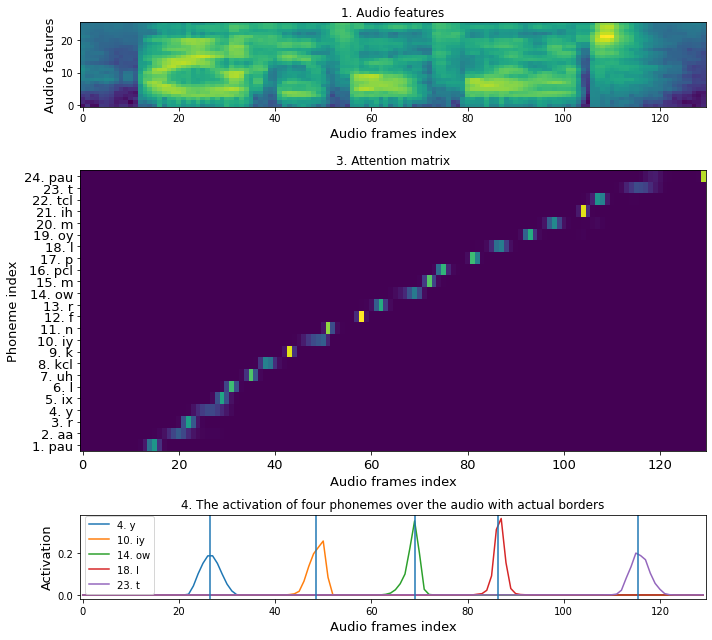

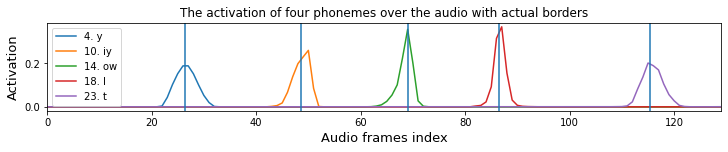

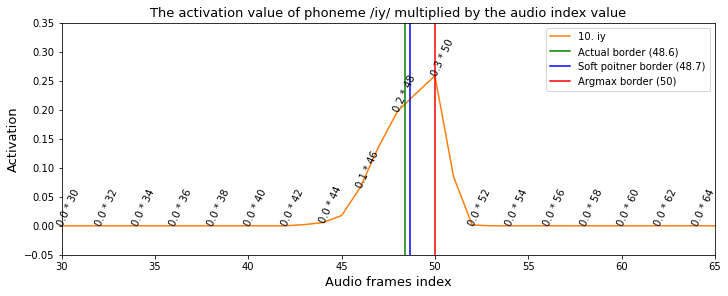

In [0]:
inp: Utterance = test_dataset[ 36  ]  # 36  1168 933

audio = inp.features.clone()
length = audio.shape[0]

label_vec = inp.label_vec
actual_borders = inp.border
transcription = inp.in_transcription
t_count, t_features = transcription.shape

attention = soft_pointer_model.with_weights(transcription.unsqueeze(0), None, audio.unsqueeze(0), None).detach().squeeze(0)

audio = audio.clone()
audio -= audio.min()
audio /= audio.max()

labels_ids = np.argmax(transcription.cpu(), axis=1).tolist()
labels = [KNOWN_LABELS[lab] for lab in labels_ids]
labels_pos = actual_borders.cpu().tolist()

fig = plt.figure(figsize=(10, 9), constrained_layout=True)
gs = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 10, 3])#, width_ratios=[5, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
# ax4 = fig.add_subplot(gs[1, 1], sharey=ax2)

ax1.imshow(audio.cpu().numpy().T, origin="lower", aspect='auto')
ax1.title.set_text("1. Audio features")
ax1.set_ylabel('Audio features', fontsize=13)
ax1.set_xlabel('Audio frames index', fontsize=13)

ax2.imshow(attention.cpu().numpy(), origin="lower", aspect='auto')
ax2.title.set_text("3. Attention matrix")
ax2.set_xlabel('Audio frames index', fontsize=13)
ax2.set_ylabel('Phoneme index', fontsize=13)
ax2.tick_params(axis='both', which='both', labelsize=13)
ax2.set_yticks(list( range(t_count)))
ax2.set_yticklabels([f"{i+1}. {p}{(i%2 == 6) * ' - - '}" for i, p in enumerate(labels)])

ax3.plot(attention[3].cpu().numpy(), label=f'4. {labels[3]}')
ax3.plot(attention[10 - 1].cpu().numpy(), label=f'10. {labels[9]}')
ax3.plot(attention[14 - 1].cpu().numpy(), label=f'14. {labels[13]}')
ax3.plot(attention[18 - 1].cpu().numpy(), label=f'18. {labels[17]}')
ax3.plot(attention[23 - 1].cpu().numpy(), label=f'23. {labels[22]}')
for border in actual_borders[[3, 9, 13, 17, 22]]:
    ax3.axvline(x=border)

ax3.title.set_text("4. The activation of four phonemes over the audio with actual borders")
ax3.set_xlabel('Audio frames index', fontsize=13)
ax3.set_ylabel('Activation', fontsize=13)
ax3.legend()

# ax4.imshow(transcription.cpu().numpy())
# ax4.title.set_text("2. One-hot phoneme transcriptions transposed")
# ax4.set_ylabel('Phoneme index', fontsize=13)
# ax4.set_xlabel('One-hot phoneme ID', fontsize=13)
fig.tight_layout()


fig = plt.figure(figsize=(10, 2), constrained_layout=True)
plt.plot(attention[3].cpu().numpy(), label=f'4. {labels[3]}')
plt.plot(attention[10 - 1].cpu().numpy(), label=f'10. {labels[9]}')
plt.plot(attention[14 - 1].cpu().numpy(), label=f'14. {labels[13]}')
plt.plot(attention[18 - 1].cpu().numpy(), label=f'18. {labels[17]}')
plt.plot(attention[23 - 1].cpu().numpy(), label=f'23. {labels[22]}')
for border in actual_borders[[3, 9, 13, 17, 22]]:
    plt.axvline(x=border)
plt.xlim([0, length-1])
plt.title("The activation of four phonemes over the audio with actual borders")
plt.xlabel('Audio frames index', fontsize=13)
plt.ylabel('Activation', fontsize=13)
plt.legend()
plt.plot()


index = 9
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
att_local = attention[index].cpu().numpy()
predicted_border = (np.arange(length) * attention[index].cpu().numpy()).sum()

plt.plot(att_local, label=f'{index+1}. {labels[index]}', color=[ax2._get_patches_for_fill.get_next_color() for c in '123'][1])
# for border in actual_borders[[9]]:
#     plt.axvline(x=border, c='g')

s, e = 30, 65
for i, y in list(enumerate(att_local))[s:e:2]:
    plt.text(i-0.3, y, f'{y:.1f} * {i}', rotation=65)


plt.xlim([s, e])
plt.ylim([-0.05, 0.35])

plt.axvline(x=actual_borders[index]-0.15, c='g', label=f'Actual border ({actual_borders[index]:.1f})')
plt.axvline(x=predicted_border, c='b', label=f'Soft poitner border ({predicted_border:.1f})')
plt.axvline(x=50, c='r', label='Argmax border (50)')

plt.title("The activation value of phoneme /iy/ multiplied by the audio index value", fontsize=13)
plt.xlabel('Audio frames index', fontsize=13)
plt.ylabel('Activation', fontsize=13)
plt.legend()
plt.plot()

In [0]:
def display_uterance(inp: Utterance):
    audio = inp.features.clone()
    length = audio.shape[0]

    label_vec = inp.label_vec
    actual_borders = inp.border
    transcription = inp.in_transcription
    t_count, t_features = transcription.shape


    # audio = (audio + audio * torch.rand_like(audio) * 3) / 3
    attention = soft_pointer_model.with_weights(transcription.unsqueeze(0), None, audio.unsqueeze(0), None).detach()
    positions = soft_pointer_model.weights_to_positions(attention).detach().squeeze(0).cpu().numpy()
    attention = attention.squeeze(0)

    audio = audio.clone()
    audio -= audio.min()
    audio /= audio.max()

    labels_ids = np.argmax(transcription.cpu(), axis=1).tolist()[:-1]
    labels = [KNOWN_LABELS[lab] for lab in labels_ids]
    labels_pos = actual_borders.cpu().tolist()

    fig = plt.figure(figsize=(16, 16), constrained_layout=True)
    gs = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 3, 6])#, width_ratios=[5, 2])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
    ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)

    ax1.imshow(audio.cpu().numpy().T, origin="lower", aspect='auto')
    ax1.title.set_text("1. Audio features")
    ax1.set_ylabel('Audio features', fontsize=13)
    ax1.set_xlabel('Audio frames index', fontsize=13)

    label_colors = [ax2._get_patches_for_fill.get_next_color() for c in labels_ids]
    for i in range(0, len(labels_ids), 1):
        c = label_colors[i]
        ax2.plot(attention[i].cpu().numpy(), label=f'{i+1}. {labels[i]}', c=c)
        ax2.axvline(x=labels_pos[i], c=c, linestyle='-')
        ax2.axvline(x=positions[i], c=c, linestyle='-.')

    # ax2.set_xlim([10, 120])
    ax2.set_ylim([-0.05, 1.1])

    ax2.set_title("Predicted borders (dotted) compared with actual borders (solid)", fontsize=13)
    ax2.set_xlabel('Audio frames index', fontsize=13)
    ax2.set_ylabel('Activation', fontsize=13)

    ax3.imshow(attention.cpu().numpy(), origin="lower", aspect='auto')
    ax3.title.set_text("3. Attention matrix")
    ax3.set_xlabel('Audio frames index', fontsize=13)
    ax3.set_ylabel('Phoneme index', fontsize=13)
    ax3.tick_params(axis='both', which='both', labelsize=13)
    ax3.set_yticks(list( range(t_count)))
    ax3.set_yticklabels([f"{i+1}. {p}{(i%2 == 6) * ' - - '}" for i, p in enumerate(labels)])


## EX 36

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


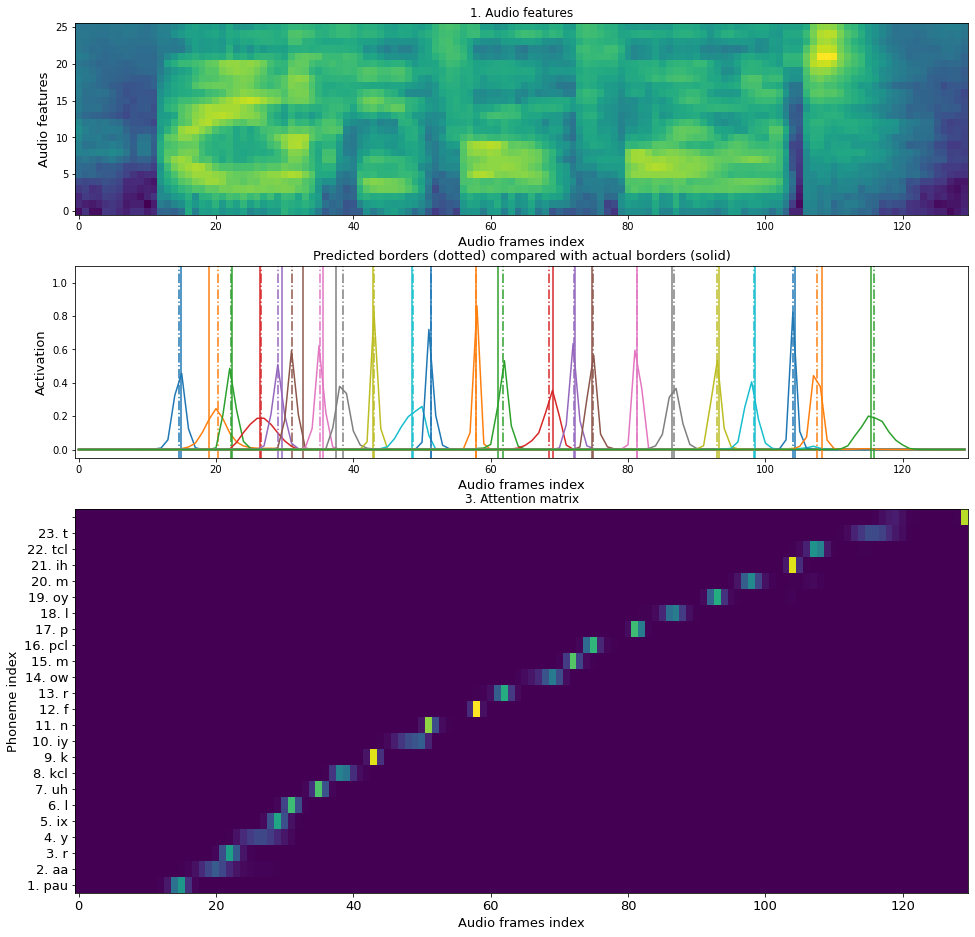

In [0]:
inp: Utterance = test_dataset[36]   # < - - - - - - - change this
display_uterance(inp)

## EX 136

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


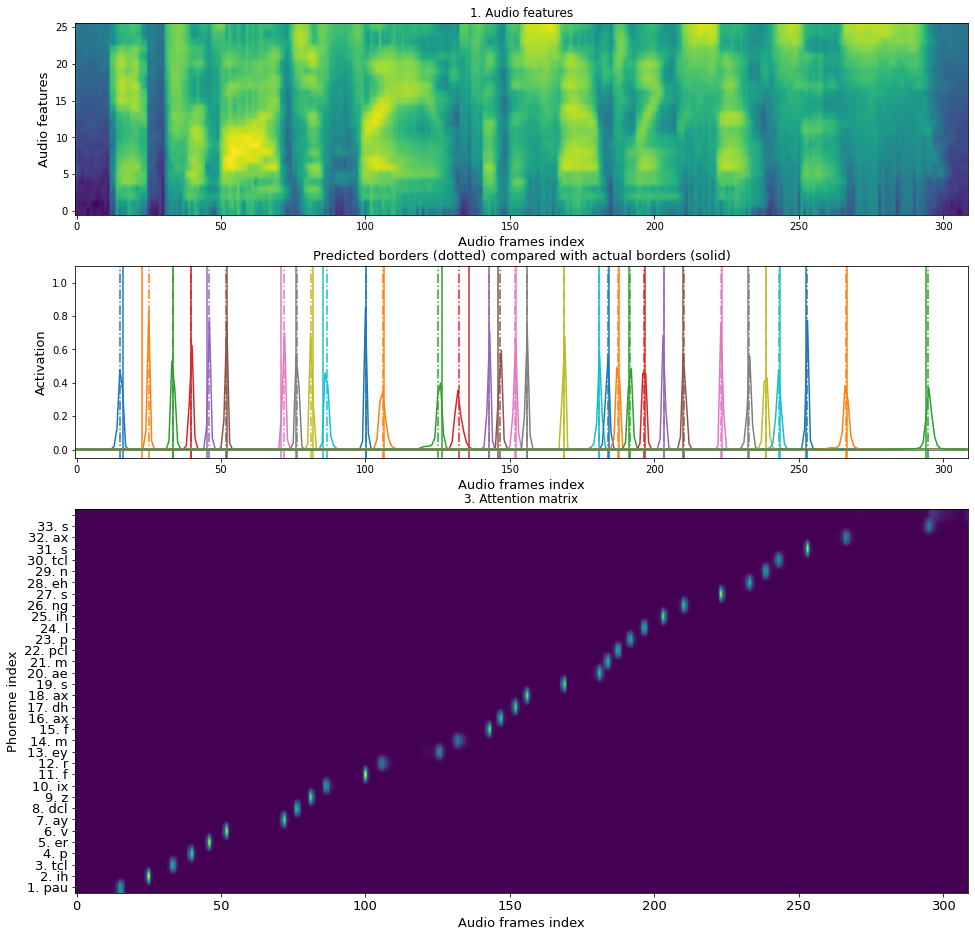

In [0]:
inp: Utterance = test_dataset[136]   # < - - - - - - - change this
display_uterance(inp)

# Position encoding

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


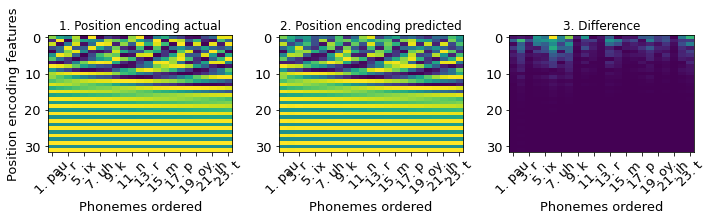

In [0]:
inp: Utterance = test_dataset[36]

audio = inp.features.clone()
length = audio.shape[0]

label_vec = inp.label_vec
actual_borders = inp.border
transcription = inp.in_transcription
t_count, t_features = transcription.shape

# return position encodings
pos_encoding_out = soft_pointer_model.with_position(transcription.unsqueeze(0), None, audio.unsqueeze(0), None).detach().cpu().squeeze(0)


fig = plt.figure(figsize=(10, 3), constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=1)

labels_ids = np.argmax(transcription.cpu(), axis=1).tolist()
labels = [KNOWN_LABELS[lab] for lab in labels_ids]
labels_pos = actual_borders.cpu().tolist()

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax3 = fig.add_subplot(gs[2], sharey=ax1)

ax1.imshow(inp.position.cpu().numpy().T, aspect='auto')
ax1.title.set_text("1. Position encoding actual")
ax1.set_xlabel('Phonemes ordered', fontsize=13)
ax1.set_ylabel('Position encoding features', fontsize=13)
ax1.tick_params(axis='both', which='both', labelsize=13)
ax1.set_xticks(list(range(t_count - 1))[::2])
ax1.set_xticklabels([f"{i+1}. {p}{(i%2 == 6) * ' - - '}" for i, p in enumerate(labels)][::2], rotation=45)

ax2.imshow(pos_encoding_out.cpu().numpy().T, aspect='auto')
ax2.title.set_text("2. Position encoding predicted")
ax2.set_xlabel('Phonemes ordered', fontsize=13)
ax2.tick_params(axis='both', which='both', labelsize=13)
ax2.set_xticks(list(range(t_count - 1))[::2])
ax2.set_xticklabels([f"{i+1}. {p}{(i%2 == 6) * ' - - '}" for i, p in enumerate(labels)][::2], rotation=45)

ax3.imshow((pos_encoding_out - inp.position).abs().cpu().numpy().T, aspect='auto')
ax3.title.set_text("3. Difference")
ax3.set_xlabel('Phonemes ordered', fontsize=13)
ax3.tick_params(axis='both', which='both', labelsize=13)
ax3.set_xticks(list(range(t_count - 1))[::2])
ax3.set_xticklabels([f"{i+1}. {p}{(i%2 == 6) * ' - - '}" for i, p in enumerate(labels)][::2], rotation=45)
fig.tight_layout()
